# Computational Thermofluid Dynamics - Chapter 2

Technical University of Munich, Professur für Thermofluiddynamik - Pr. Polifke

Created: 04/2024 | J. Yao, N. Garcia, G. Varillon

==============================================================================================

# Finite Differences
The 2D steady heat equation reads:
$$
\frac{\partial}{\partial x}(\lambda\frac{\partial T}{\partial x}) + \frac{\partial}{\partial y}(\lambda\frac{\partial T}{\partial y}) = 0
$$

In [1]:
import numpy as np

class SteadyHeat2D:
    def __init__(self, Lx, Ly, dimX, dimY, if_point=False, point_i=0, point_j=0, point_q=0.0):
        self.l = Lx
        self.h = Ly
        self.dimX = dimX
        self.dimY = dimY
        self.if_point = if_point
        self.point_i = point_i
        self.point_j = point_j
        self.point_q = point_q

        self.dx = Lx / (dimX - 1)
        self.dy = Ly / (dimY - 1)

        self.A = np.zeros((self.dimX * self.dimY, self.dimX * self.dimY))
        self.b = np.zeros(self.dimX * self.dimY)

    def set_inner(self):
        for i in range(1, self.dimY - 1):
            for j in range(1, self.dimX - 1):
                k = i * self.dimX + j
                self.A[k, k] = -2 * (1 / self.dx**2 + 1 / self.dy**2)
                self.A[k, k - 1] = 1 / self.dx**2
                self.A[k, k + 1] = 1 / self.dx**2
                self.A[k, k - self.dimX] = 1 / self.dy**2
                self.A[k, k + self.dimX] = 1 / self.dy**2
                self.b[k] = 0

    def set_south(self, bc_type, T_d=0.0, q=0.0, alpha=0.0, T_inf=0.0):
        for j in range(self.dimX):
            k = j
            self.A[k, :] = 0
            self.b[k] = 0
            
            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d
            elif bc_type == 'N':
                self.A[k, k] = -3 / 2 / self.dy
                self.A[k, k + self.dimX] = 2 / self.dy
                self.A[k, k + 2 * self.dimX] = -1 / 2 / self.dy
                self.b[k] = q
            elif bc_type == 'R':
                self.A[k, k] = -3 / 2 / self.dy + alpha
                self.A[k, k + self.dimX] = 2 / self.dy
                self.A[k, k + 2 * self.dimX] = -1 / 2 / self.dy
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')

    def set_north(self, bc_type, T_d=0.0, q=0.0, alpha=0.0, T_inf=0.0):
        for j in range(self.dimX):
            k = (self.dimY - 1) * self.dimX + j
            self.A[k, :] = 0
            self.b[k] = 0

            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d
            elif bc_type == 'N':
                self.A[k, k] = 3 / 2 / self.dy
                self.A[k, k - self.dimX] = -2 / self.dy
                self.A[k, k - 2 * self.dimX] = 1 / 2 / self.dy
                self.b[k] = q
            elif bc_type == 'R':
                self.A[k, k] = 3 / 2 / self.dy + alpha
                self.A[k, k - self.dimX] = -2 / self.dy
                self.A[k, k - 2 * self.dimX] = 1 / 2 / self.dy
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')

    def set_west(self, bc_type, T_d=0.0, q=0.0, alpha=0.0, T_inf=0.0):
        for i in range(self.dimY):
            k = i * self.dimX
            self.A[k, :] = 0
            self.b[k] = 0

            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d
            elif bc_type == 'N':
                self.A[k, k] = -3 / 2 / self.dx
                self.A[k, k + 1] = 2 / self.dx
                self.A[k, k + 2] = -1 / 2 / self.dx
                self.b[k] = q
            elif bc_type == 'R':
                self.A[k, k] = -3 / 2 / self.dx + alpha
                self.A[k, k + 1] = 2 / self.dx
                self.A[k, k + 2] = -1 / 2 / self.dx
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')

    def set_east(self, bc_type, T_d=0.0, q=0.0, alpha=0.0, T_inf=0.0):
        for i in range(self.dimY):
            k = i * self.dimX + self.dimX - 1
            self.A[k, :] = 0
            self.b[k] = 0

            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d
            elif bc_type == 'N':
                self.A[k, k] = 3 / 2 / self.dx
                self.A[k, k - 1] = -2 / self.dx
                self.A[k, k - 2] = 1 / 2 / self.dx
                self.b[k] = q
            elif bc_type == 'R':
                self.A[k, k] = 3 / 2 / self.dx + alpha
                self.A[k, k - 1] = -2 / self.dx
                self.A[k, k - 2] = 1 / 2 / self.dx
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')

    def solve(self):
        self.set_inner()
        if self.if_point:
            k = self.point_i * self.dimX + self.point_j
            self.b[k] = -self.point_q
        self.T = np.linalg.solve(self.A, self.b)
        self.T = self.T.reshape(self.dimY, self.dimX)
        return self.T

In [2]:
# Test
Lx = 1.0
Ly = 1.0
dimX = 101
dimY = 101

heat = SteadyHeat2D(Lx, Ly, dimX, dimY, if_point=True, point_i=50, point_j=50, point_q=1000)
heat.set_south('N', q=0.0)
heat.set_north('R', alpha=1.0, T_inf=0.0)
heat.set_east('R', alpha=1.0, T_inf=0.0)
heat.set_west('D', T_d=1.0)

T = heat.solve()


In [3]:
import matplotlib.pyplot as plt


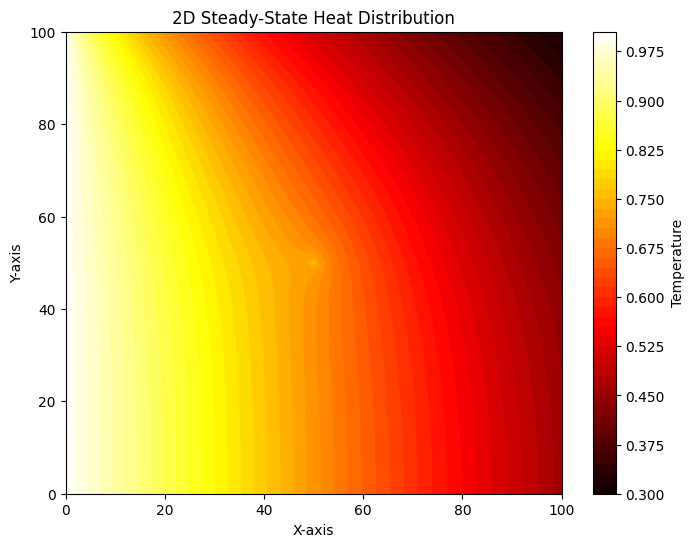

In [4]:
# Generate a plot
plt.figure(figsize=(8, 6))
plt.contourf(T, levels=50, cmap="hot")  # Use a colormap like 'hot'
plt.colorbar(label='Temperature')      # Add a colorbar for the scale
plt.title("2D Steady-State Heat Distribution")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
